# <center>TITANIC SURVIVOR PREDICTION </center>

<center><img src="k-mitch-hodge-y-9-X5-4-vU-unsplash.jpg"
     title="London in 1912"
     alt="London in 1912"
     style="float: center ; width:600px;height:350px;"
     /></center>
 

## Group 2 Team Member:
<br>
<font size=4>
-  Ahmad Allam<br>
- Naif Alfouzan<br>
- Sarah Aljudaibi

</font>

# Problem Statment

<b>Build a machine learning model that predicts which passengers survived from the Titanic shipwreck.</b>

<blockquote><font color=#00695C>When the RMS Titanic went down, April 15th, 1912, there were many people who were blamed for the enormous disaster that took the lives of over 1500 people. The first, and most obvious, person to blame was Captain Edward J Smith. As captain of the biggest ship in the world, he was the one in charge of everything, including the safety of everyone on board the Titanic.</font></blockquote>

# Dataset Description
<b>
<br>  
 
- survival: Survivor(1), victim(0)
- class: The passenger Class upper(1), middle(2), worker(3)
- name:  Name of the passenger
- sex: Gender of the passenger
- age: Age of the passenger
- sibsp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- ticket: Ticket Number
- fare: Passenger Fare
- cabin: Cabin
- embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

</b>

# The Notebook

#### The notebook is classified to the following sections:
<a href='#the_destination_1'>1. Import Libraries</a><br>
<a href='#the_destination_2'>2. Import Data</a><br>
<a href='#the_destination_3'>3. Exploratory Data Analysis (EDA)</a><br>
<a href='#the_destination_4'>4. Data Cleaning</a>
-   <a href='#the_destination_4.1'>4.1 Train Datafream Cleaning</a><br>
-   <a href='#the_destination_4.2'>4.2 Test Dataframe Cleaning</a><br><br>


<a href='#the_destination_5'>5. Machine Learning</a><br>
-   <a href='#the_destination_5.1'>5.1 Model Preparation</a>
-      <a href='#the_destination_5.2'>5.2 Models</a>

          -   <a href='#the_destination_5.2.1'>5.2.1 Random Forest</a>

          -   <a href='#the_destination_5.2.2'>5.2.2 Random Forest Grid Search</a>

          -   <a href='#the_destination_5.2.3'>5.2.3 AdaBoost GridSearch</a>

          -   <a href='#the_destination_5.2.4'>5.2.4 SVM Grid Search</a>

          -   <a href='#the_destination_5.2.5'>5.2.5 KNN Grod Serach</a>

          -   <a href='#the_destination_5.2.6'>5.2.6 Decision Tree</a>

          -   <a href='#the_destination_5.2.7'>5.2.7 Bagging With Decision Tree</a>

          -    <a href='#the_destination_5.2.8'>5.2.8 Logistic Regression</a>

<a href='#the_destination_6'>6. Final Results</a><br>
<a href='#the_destination_7'>7. Conclusion and Recommendations</a><br>
<a href='#the_destination_8'>8. References</a><br>



<a id='the_destination_1'></a>

# 1. Import Libraries

In [199]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression

%matplotlib inline

<a id='the_destination_2'></a>
# 2. Import Data



In [200]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gender_sub=pd.read_csv('gender_submission.csv')

<a id='the_destination_3'></a>

# 3. EDA

In [201]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [202]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [203]:
train.shape

(891, 12)

In [204]:
test.shape

(418, 11)

In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [206]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [207]:
print('Is there a missing data in train dataset:')
train.isnull().sum()

Is there a missing data in train dataset:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [208]:
print('Is there a missing data in test dataset:')
test.isnull().sum()

Is there a missing data in test dataset:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [209]:
#return a series containing the counts of all the unique values in a column
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [210]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<b>In the summery statistics:</b>
   - survived: has only 0 & 1 values so the statistics column shows low variance. The mean is less than 0.5 which indicates that the number of victims is higher than survived
   - Pclass: has only 1&2&3 values so the statistics column shows low variance.
   - Age: has min of 0.4 and max of 80 and the mean is almost equal the median so it might be positive skewed
   - SibSp: the mean here is greater than the median so it might be positive skewed
   - Parch: the mean here is greater than the median so it might be positive skewed
   - Fare: the variance is very high and the mean is significantly higher than the median so it is positive skewed  
       


In [211]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<b>In the summery statistics:</b>
   - survived: has only 0 & 1 values so the statistics column shows low variance. The mean is less than 0.5 which indicates that the number of victims is higher than survived
   - Pclass: has only 1&2&3 values so the statistics column shows low variance.
   - Age: has min of 0.4 and max of 80 and the mean is almost equal the median so it might be positive skewed
   - SibSp: the mean here is greater than the median so it might be positive skewed
   - Parch: the mean here is greater than the median so it might be positive skewed
   - Fare: the variance is very high and the mean is significantly higher than the median so it is positive skewed  

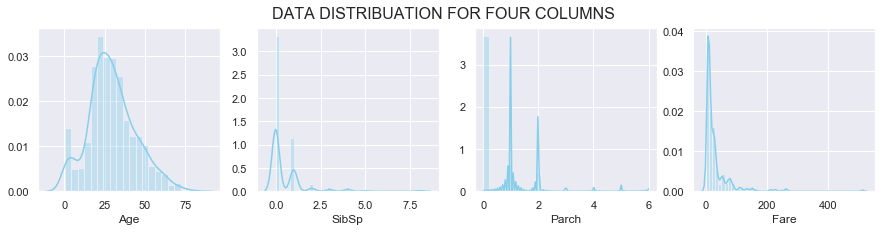

In [212]:
#train dataframe distribution
list_columns=list(train.iloc[:,[5,6,7,9]])

fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(15,3)) 
ax = ax.ravel() 
for i, column in enumerate(list_columns): 
    sns.distplot(train[column].dropna(),color='skyblue',ax=ax[i])

fig.suptitle('DATA DISTRIBUATION FOR FOUR COLUMNS\n ', fontsize=16);


In [213]:
print("Skewness of Age: %f" % train['Age'].skew())
print("Skewness of SibSp: %f" % train['SibSp'].skew())
print("Skewness of Parch: %f" % train['Parch'].skew())
print("Skewness of Fare: %f" % train['Fare'].skew())

Skewness of Age: 0.389108
Skewness of SibSp: 3.695352
Skewness of Parch: 2.749117
Skewness of Fare: 4.787317


In [214]:
#Observe the Ranges of some columns (difference between the maximum and minimum)

Age_range=np.ptp(train['Age'])

Fare_range=np.ptp(train['Fare'])

print('The Age range:',Age_range)
print('The Fare range:',Fare_range)

The Age range: 79.58
The Fare range: 512.3292


/Users/sarahaljudaibi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


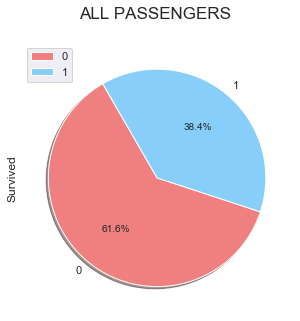

In [215]:
#plot pie to see the percentage of survived column
colors = [ 'lightcoral', 'lightskyblue','gold']

train['Survived'].value_counts().plot.pie( figsize=(10, 5),
     colors=colors,autopct='%1.1f%%', shadow=True,legend=True, startangle=120);

plt.title('ALL PASSENGERS \n',fontsize=17);



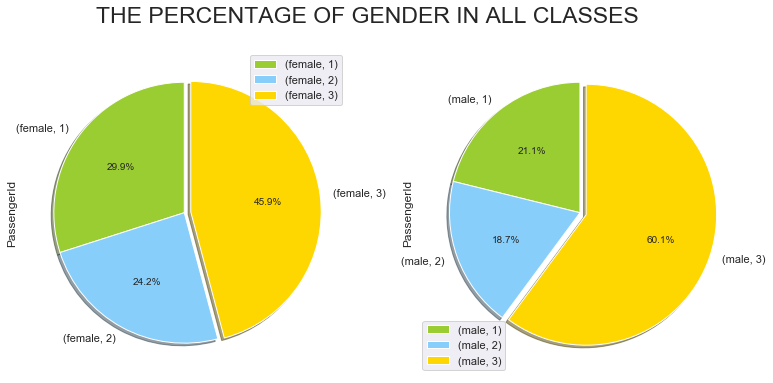

In [216]:

fig,ax = plt.subplots(ncols=2,figsize=(13,6))
fig.suptitle('THE PERCENTAGE OF GENDER IN ALL CLASSES ', fontsize=23)

#style the pie plor
colors = ['yellowgreen', 'lightskyblue','gold']
explode = (0,0,0.05)

# groupbed the data based on the gender and the class of the passenger
gender_class=train.groupby(['Sex','Pclass']).agg('count')

#plot the pie to display the percentage all the passengers [female,male] in all the classes
gender_class.iloc[0:3,[0]].plot.pie(subplots=True, colors=colors,autopct='%1.1f%%',
    shadow=True,legend=True, startangle=90,explode = explode,ax=ax[0])

gender_class.iloc[3:,[0]].plot.pie(subplots=True,colors=colors,autopct='%1.1f%%',
    shadow=True, startangle=90,explode = explode,ax=ax[1]);



In [217]:
#filtered the data based on survived passenger
# in the training data: 342 passenger survived from 891 passenger
train[(train['Survived'] == 1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [218]:
#136 from class 1 survived
##survived by class percentage
train[(train['Survived'] == 1) & (train['Pclass'] == 1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C


In [219]:
# 119  survived from class 3
# poor mr.leo
train[(train['Survived'] == 1) & (train['Pclass'] == 3)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q


In [220]:

#calculate mean of survived people in each class  
#to know how many survived out of total for each class

# from the table it's seems like the average of survived from class 1 is higher than the other two classes
# survived passengers of class 3 has the lowest average of the three classes
train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [221]:

Sex_male=train[(train['Sex']=='male')]

print('Total males in the ship=',Sex_male['Sex'].count())

# to calculate the female numbers we subtract the males from all the passengers number
print('Total females in the ship=',891-Sex_male['Sex'].count())


Total males in the ship= 577
Total females in the ship= 314


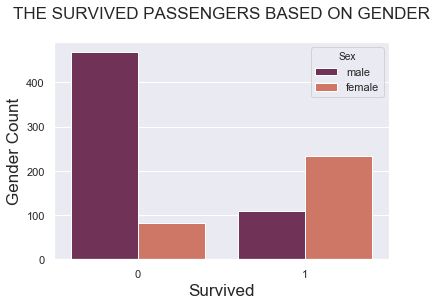

In [222]:
sns.set(style="darkgrid")
sns.countplot(x="Survived", data=train,hue="Sex",palette="rocket",saturation=0.6);

plt.title('THE SURVIVED PASSENGERS BASED ON GENDER\n',fontsize=17)

plt.xlabel('Survived',fontsize=17)
plt.ylabel('Gender Count',fontsize=17);
 

- most of the victims are men.
- a lot of the survivors passenger are women.

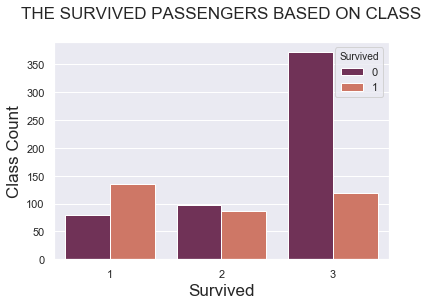

In [223]:
sns.countplot(x="Pclass", hue="Survived", data=train,palette="rocket",saturation=0.6);

plt.title('THE SURVIVED PASSENGERS BASED ON CLASS\n',fontsize=17)
plt.xlabel('Survived',fontsize=17)
plt.ylabel('Class Count',fontsize=17);





##### Noticing each class victimes and survivors: 
- <b>class 1</b> has the highest survivors, while <b>class 2</b> is the lowest class with survivors
- the victims of<b> class 3</b> peaked than the other two classes. 
  - It might be the effect of the number of passengers in this class as it has the highest passengers number
  - another reason could be becsuse they were staying at the down level of the ship,so they barely got the chance to save themselves.

-------------------------------------------
<img src="1912.jpg"
     title="London in 1912"
     alt="London in 1912"
     style="float: left; margin-right: 10px ; width:220px;height:230px;"
     />
 
#### Social class in 1912

<blockquote>London was divided in a class system. There was the upper class, middle class and the working class. The upper class made up 5% of Britain. They were the richest and owned practically everything. The middle class were the people who were doing okay and worked in offices. The working class made up 80% of Britain but they owned very little. They led tough lives and barely had enough money to live.
</blockquote>

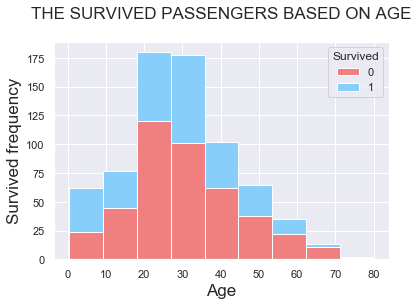

In [224]:
Age_survived=train.pivot(columns='Survived').Age

colors = ['lightcoral', 'lightskyblue']
Age_survived.plot(kind = 'hist', stacked=True,bins=9,figsize=(6,4),color=colors)

plt.title('THE SURVIVED PASSENGERS BASED ON AGE\n',fontsize=17)
plt.xlabel('Age',fontsize=17)
plt.ylabel('Survived frequency',fontsize=17);


##### percentage of each bin(age):
 - from the plot above, most of passengers were ranged from 20 to 40 year
 - ages less than 10 had a higher survival rate.
 - all elderly passengers of age 80 were survived.
 - the majority of passengers with 10-30 year old did not survive.

<blockquote><b>13 Months Old, 
    The Youngest Victim Was Just 13 Months Old</b></blockquote>

/Users/sarahaljudaibi/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


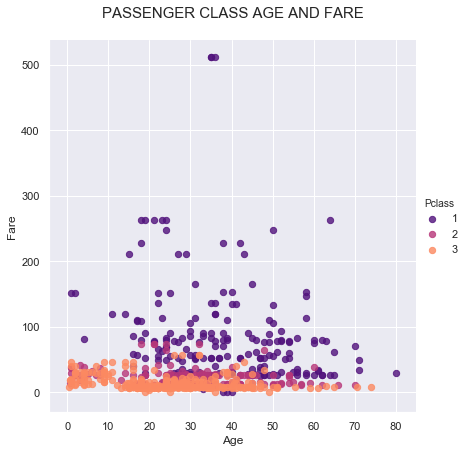

In [225]:
sns.lmplot('Age', 'Fare', data=train, fit_reg=False, hue="Pclass",
scatter_kws={"marker": "o", "s": 40},palette="magma",size=6);
plt.title('PASSENGER CLASS AGE AND FARE\n',fontsize=15);


<b>By observing the class 1 fare and age, we can guess that most survivors around the age(20,40) are from class 1. We can also observe that elderly people paid less in class 1</b>

In [226]:
#correlation of features with Survived 
print(train.corr()["Survived"].sort_values())

print('\nPclass is the highest negative correlation')
print('Fare is the Highest positive correlation')

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

Pclass is the highest negative correlation
Fare is the Highest positive correlation


In [227]:
#calculate the covariance to quantify the strength and direction of a relationship between two variables

X_column=train['Fare'].copy()
X_column_2=train['Pclass'].copy()

y_column=train['Survived'].copy()

cov_matrix_1 = np.cov(X_column, y_column)

cov_matrix_2 = np.cov(X_column_2, y_column)

print('The convariance between Fare and Survived:\n',cov_matrix_1)

print('\nThe convariance between Pclass and Survived:\n',cov_matrix_2)


#If the correlation is positive, then the covariance is positive, as well.

#If the correlation is negative, then the covariance is negative, as well.

#If the correlation is weak, then the covariance is close to zero.

The convariance between Fare and Survived:
 [[2.46943685e+03 6.22178683e+00]
 [6.22178683e+00 2.36772217e-01]]

The convariance between Pclass and Survived:
 [[ 0.69901512 -0.13770287]
 [-0.13770287  0.23677222]]


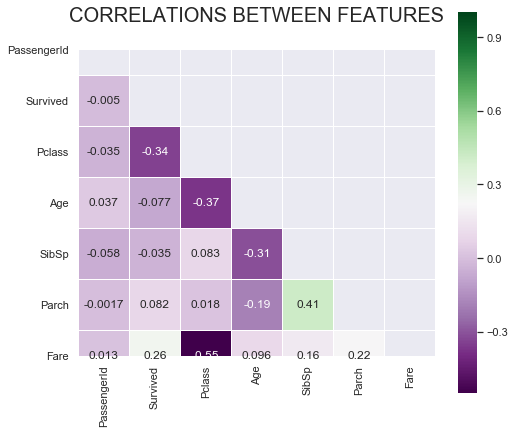

In [228]:
## heatmeap to see the correlation between features. 

mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (8,7))
sns.heatmap(train.corr(), annot=True,mask = mask, cmap ='PRGn',linewidths=0.1,square=True)
plt.title("CORRELATIONS BETWEEN FEATURES\n", y = 1.03,fontsize = 20);

#sibSP and Parch is positively correlated


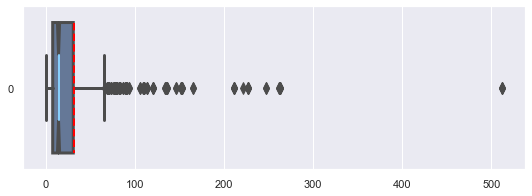

In [229]:
fig,ax = plt.subplots(1,figsize=(9, 3))

sns.boxplot(data=train['Fare'], orient='h', fliersize=8, 
linewidth=3, notch=True, saturation=0.5,showmeans=True,
meanline=True,medianprops={'linewidth': 2, 'color': 'lightskyblue'},
meanprops={'linewidth': 2, 'color': 'red'}, ax=ax);

#use the box plot to observe  the range, interquartile range,mean,median, and outliers

# the mean is the red line
# the median is the light blue line

# the fare column has multi fares, but in order to achieve the correct prediction we should ignore the outliers 

<b>Conclusion from visualization:
- we can observe that the class played important role for Survival of passengers.
- most of the survived were women and cheldren.
- class 3 passengers were the victims in this tragedy.
</b>


-----------------------------

<a id='the_destination_4'></a>
# 4. Data Cleaning

<a id='the_destination_4.1'></a>
## 4.1 Train Dataframe Cleaning

In [230]:
#observe the missing value in train
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [231]:
# fill the missing valus in Embarked column with the most frequent value using the mode
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode().iloc[0])
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [232]:
#replace each name with the passenger title only 

v=['Mr.','Miss.','Mrs.','Master.']
train['Name'] = train['Name'].apply(lambda x: ' '.join(np.array(x.split(' '))[np.in1d(x.split(' '),v)]))

train['Name'].replace('','NoTitle',inplace=True)

In [233]:
#get the mean for each name category

Age_mean = pd.pivot_table(train, values='Age',index=['Name'],aggfunc=np.mean)

display(Age_mean)

,Age
Name,
Master.,4.574167
Miss.,21.773973
Mr.,32.368090
Mrs.,35.898148
NoTitle,42.384615


In [234]:
#define a function to fill the missing values in age
#we are going to use the mean from the above table to fill the age
def impute_age(age_name): 
    
    Age = age_name[0]
    Name = age_name [1]
    
    # if the values ==NaN than it's true and will enter the if-condition   
    if pd.isnull(Age):
        
        #if the name== Mr. than fill the missing value with it's mean
        if Name == 'Mr.':
            return 32
        
        #if the name== miss. than fill the missing value with it's mean
        elif Name == 'Miss.':
            return 22
        
        #if the name== Mrs. than fill the missing value with it's mean
        elif Name == 'Mrs.':
            return 35
        
        #if the name== Master. than fill the missing value with it's mean
        elif Name =='Master.':
            return 5

        else:
            return 42
    else:
        return Age

In [235]:
#call the function above with the age column
train.Age = train.apply(lambda x :impute_age(x[['Age', 'Name']] ) , axis = 1)

In [236]:
train['Age'].describe()

count    891.000000
mean      29.699405
std       13.251659
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [237]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [238]:
#Rerange the Age based on its distribution from its statistics.
# As the mean is almost 30, and standard deviation is almost 13, so the majority of passenger ages are 
#placed between 17 and 43..
# the uper level = mean+standard deviation = 30-13=17
# the lower level = mean-standard deviation = 30+13=43
# the other group will be by adding the standard deviation value

train.loc[ train['Age'] <= 17, 'Age'] = 0
train.loc[(train['Age'] > 17) & (train['Age'] <= 43), 'Age'] = 1
train.loc[(train['Age'] > 43) & (train['Age'] <= 56), 'Age'] = 2
train.loc[(train['Age'] > 56) & (train['Age'] < 81), 'Age'] = 3

In [239]:
#add new column contain the addition of two columns:[SibSp + Parch] +1
# we add +1 here because some of the passengers are alone in the ship with no siblings or parent. 
#so it get "the sibilings number" + "the parents number" + the passenger hemself
train['FamilyMember'] = train['SibSp'] + train['Parch'] + 1

In [240]:
#Drop SibSp,Parch and the Ticket after adding the family member column
train=train.drop(['SibSp','Parch','Ticket'],axis=1)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilyMember
0,1,0,3,Mr.,1,1.0,7.2500,NaN,S,2
1,2,1,1,Mrs.,0,1.0,71.2833,C85,C,2


In [241]:
DataFare=train.copy()
#use qcut to cut variable into equal-sized buckets based on sample quantiles
DataFare['Fare_Q'] = pd.qcut(train['Fare'], 4)

#group Fare and Survived columns and calculate it's mean
DataFare[['Fare_Q', 'Survived']].groupby(['Fare_Q'], as_index=False).mean()

,Fare_Q,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [242]:
#Rerange the Fare based on what we have from the table above

train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3


train['Fare'] = train['Fare'].astype(int)


### Using classifiers to predict the cabin missing values for train dataframe

* Since there are a lot of missing values in the Cabin column, and it doesn't make since to fill it with 0 & 1 because all the passengers should have a cabin on the ship
* We are going to use a classifier to help predict the missing values of the cabin column

In [243]:
#take the unique values in Cabin column as a list in a new variable
train_cabin_fill=list(train['Cabin'].unique())

#since the first value in the list is nan, we will use pop() 
train_cabin_fill.pop(0)

print(train_cabin_fill)
len(train_cabin_fill)

['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 

147

In [244]:
#define a function to replace all the cabin characterwith number to a simple character 
#for example Cabin with name: C2,C34,C64 will be replaced with C
def search_cabin(data,character):
    
    Result = [idx for idx in data if idx.lower().startswith(character.lower())]
    return Result

train['Cabin'].replace(search_cabin(train_cabin_fill,'A'), 'a',inplace=True)

train['Cabin'].replace(search_cabin(train_cabin_fill,'B'), 'b',inplace=True)

train['Cabin'].replace(search_cabin(train_cabin_fill,'C'), 'c',inplace=True)

train['Cabin'].replace(search_cabin(train_cabin_fill,'D'), 'd',inplace=True)

train['Cabin'].replace(search_cabin(train_cabin_fill,'E'), 'e',inplace=True)

train['Cabin'].replace(search_cabin(train_cabin_fill,'G'), 'g',inplace=True)

train['Cabin'].replace(search_cabin(train_cabin_fill,'F'), 'f',inplace=True)

In [245]:

train_cabin_pivot = pd.pivot_table(train, index=['PassengerId','Pclass',
'Cabin','Name','Age','Embarked' ,'Survived' ,'Sex','FamilyMember'],values=['Fare'])

In [246]:
train_cabin_pivot = train_cabin_pivot.reset_index()

train_cabin_pivot.apply(pd.to_numeric,errors='ignore')

train_cabin_pivot.head()

,PassengerId,Pclass,Cabin,Name,Age,Embarked,Survived,Sex,FamilyMember,Fare
0,2,1,c,Mrs.,1.0,C,1,0,2,3
1,4,1,c,Mrs.,1.0,S,1,0,2,3
2,7,1,e,Mr.,2.0,S,0,1,1,3
3,11,3,g,Miss.,0.0,S,1,0,3,2
4,12,1,c,Miss.,3.0,S,1,0,1,2


In [247]:
train_cabin_pivot=pd.get_dummies(train_cabin_pivot, columns=['Name','Embarked'],drop_first=True)
train_cabin_pivot.head()

,PassengerId,Pclass,Cabin,Age,Survived,Sex,FamilyMember,Fare,Name_Miss.,Name_Mr.,Name_Mrs.,Name_NoTitle,Embarked_Q,Embarked_S
0,2,1,c,1.0,1,0,2,3,0,0,1,0,0,0
1,4,1,c,1.0,1,0,2,3,0,0,1,0,0,1
2,7,1,e,2.0,0,1,1,3,0,1,0,0,0,1
3,11,3,g,0.0,1,0,3,2,1,0,0,0,0,1
4,12,1,c,3.0,1,0,1,2,1,0,0,0,0,1


## start the classefiers for cabin prediction, train dataframe

In [248]:
# get all rows of Cabin with the missing values in a variable
train_cabin_null = train[train['Cabin'].isnull()]

# dummies
train_cabin_null=pd.get_dummies(train_cabin_null, columns=['Name','Embarked'],drop_first=True)

train_cabin_null.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,FamilyMember,Name_Miss.,Name_Mr.,Name_Mrs.,Name_NoTitle,Embarked_Q,Embarked_S
0,1,0,3,1,1.0,0,NaN,2,0,1,0,0,0,1
2,3,1,3,0,1.0,1,NaN,1,1,0,0,0,0,1
4,5,0,3,1,1.0,1,NaN,1,0,1,0,0,0,1
5,6,0,3,1,1.0,1,NaN,1,0,1,0,0,1,0
7,8,0,3,1,0.0,2,NaN,5,0,0,0,0,0,1


In [249]:

train_cabin_pivot.head()

#put the target in cabin_X_train without the ID and Cabin
cabin_X_train=train_cabin_null.drop(['PassengerId','Cabin'],axis=1)

#define X and y
X=train_cabin_pivot.drop(['PassengerId','Cabin'],axis=1).copy()
y=train_cabin_pivot['Cabin'].copy()

#using the random forest classifier
RandomForest = RandomForestClassifier(n_estimators=100,random_state=1)

#train the model
RandomForest.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [250]:
#get the prediction of the cabin
pred=RandomForest.predict(cabin_X_train)

In [251]:
#fill the null values in the train data with the prediction
train.loc[pd.isnull(train['Cabin']), 'Cabin'] = pred

In [252]:
#map each alphabet with number
train['Cabin']=train['Cabin'].map({'a': 0, 'b': 1,'c':2,'d':3,'e':4,'f':5,'g':6,'T':7})

In [253]:
train.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Fare            0
Cabin           0
Embarked        0
FamilyMember    0
dtype: int64

In [254]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilyMember
0,1,0,3,Mr.,1,1.0,0,0,S,2
1,2,1,1,Mrs.,0,1.0,3,2,C,2
2,3,1,3,Miss.,0,1.0,1,1,S,1
3,4,1,1,Mrs.,0,1.0,3,2,S,2
4,5,0,3,Mr.,1,1.0,1,0,S,1


--------------------

<a id='the_destination_4.2'></a>

## 4.2 Test Dataframe Cleaning

In [255]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [256]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [257]:
#map each gender with with 0 or 1
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [258]:
#replace each name with the passenger title only 
title=['Mr.','Miss.','Mrs.','Master.']
test['Name'] = test['Name'].apply(lambda x: ' '.join(np.array(x.split(' '))[np.in1d(x.split(' '),title)]))
test['Name'].replace('','NoTitle',inplace=True)

In [259]:
#get the mean for each name category
Age_mean_test = pd.pivot_table(test, values='Age',index=['Name'],aggfunc=np.mean)

display(Age_mean_test)

,Age
Name,
Master.,7.406471
Miss.,21.774844
Mr.,32.000000
Mrs.,38.903226
NoTitle,43.833333


In [260]:
# fill the missing values in Age column with the most frequent value using the mode
test.Age = test.apply(lambda x :impute_age(x[['Age', 'Name']] ) , axis = 1)
test['Age'].isnull().sum()

0

In [261]:
# add the family member column with [SibSp + Parch + 1]
test['FamilyMember'] = test['SibSp'] + test['Parch'] + 1

In [262]:
# drop three columns
test= test.drop(['SibSp','Parch','Ticket'], axis=1)

In [263]:
test['Age'].describe()

count    418.000000
mean      30.130383
std       13.011882
min        0.170000
25%       22.000000
50%       30.000000
75%       36.000000
max       76.000000
Name: Age, dtype: float64

In [264]:
#Rerange the Age based on its distribution from its statistics.
# As the mean is almost 30, and standard deviation is around 13, so the majority of passenger ages are 
#placed between 17 and 43..
# the uper level = mean+standard deviation = 30-13=17
# the lower level = mean-standard deviation = 30+13=43
# the other group will be by adding the standard deviation value

test.loc[ test['Age'] <= 17, 'Age'] = 0
test.loc[(test['Age'] > 17) & (train['Age'] <= 43), 'Age'] = 1
test.loc[(test['Age'] > 43) & (train['Age'] <= 56), 'Age'] = 2
test.loc[(test['Age'] > 56) & (train['Age'] < 81), 'Age'] = 3

In [265]:
test['Age'] = test['Age'].astype(int)

In [266]:
test['Fare'].sort_values().tail()

59     262.3750
53     263.0000
69     263.0000
343    512.3292
152         NaN
Name: Fare, dtype: float64

In [267]:
#fill the missing value with median
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

In [268]:
#use the same logic in the train cleaning for filling the Fare using the range of qcut
test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)

### use the classifer to predict cabin in test dataframe

In [269]:
#find the unique values in cabin and add it as a list in new variable
test_cabin_fill=list(test['Cabin'].unique())

#pop the nan value
test_cabin_fill.pop(0)
print(test_cabin_fill)

['B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34', 'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53', 'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116', 'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22', 'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64', 'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89', 'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78', 'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60', 'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7', 'D40', 'D38', 'C105']


In [270]:
#call the same function we define in train dataframe cleaning section


test['Cabin'].replace(search_cabin(test_cabin_fill,'A'), 'a',inplace=True)

test['Cabin'].replace(search_cabin(test_cabin_fill,'B'), 'b',inplace=True)

test['Cabin'].replace(search_cabin(test_cabin_fill,'C'), 'c',inplace=True)

test['Cabin'].replace(search_cabin(test_cabin_fill,'D'), 'd',inplace=True)

test['Cabin'].replace(search_cabin(test_cabin_fill,'E'), 'e',inplace=True)

test['Cabin'].replace(search_cabin(test_cabin_fill,'G'), 'g',inplace=True)

test['Cabin'].replace(search_cabin(test_cabin_fill,'F'), 'f',inplace=True)

In [271]:
test_cabin_pivot = pd.pivot_table(test, index=['PassengerId','Pclass',
'Cabin','Name','Age','Embarked' ,'Sex','FamilyMember'],values=['Fare'])

In [272]:
test_cabin_pivot = test_cabin_pivot.reset_index()

test_cabin_pivot.apply(pd.to_numeric,errors='ignore')

test_cabin_pivot.head()

,PassengerId,Pclass,Cabin,Name,Age,Embarked,Sex,FamilyMember,Fare
0,904,1,b,Mrs.,1,S,0,2,1
1,906,1,e,Mrs.,1,S,0,2,1
2,916,1,b,Mrs.,1,C,0,5,1
3,918,1,b,Miss.,1,C,0,2,1
4,920,1,a,Mr.,1,S,1,1,1


In [273]:
test_cabin_pivot=pd.get_dummies(test_cabin_pivot, columns=['Name','Embarked'],drop_first=True)

test_cabin_pivot.head()

,PassengerId,Pclass,Cabin,Age,Sex,FamilyMember,Fare,Name_Miss.,Name_Mr.,Name_Mrs.,Name_NoTitle,Embarked_Q,Embarked_S
0,904,1,b,1,0,2,1,0,0,1,0,0,1
1,906,1,e,1,0,2,1,0,0,1,0,0,1
2,916,1,b,1,0,5,1,0,0,1,0,0,0
3,918,1,b,1,0,2,1,1,0,0,0,0,0
4,920,1,a,1,1,1,1,0,1,0,0,0,1


### Start classifier for cabin prediction, test dataframe

We will do the same process as we did in the train section
as we said it doesn't make since to fill the column with 0 or 1

In [274]:
# find the rows with missing values in Cabin
test_cabin_null = test[test['Cabin'].isnull()]

#dummies
test_cabin_null=pd.get_dummies(test_cabin_null, columns=['Name','Embarked'],drop_first=True)

test_cabin_null.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,FamilyMember,Name_Miss.,Name_Mr.,Name_Mrs.,Name_NoTitle,Embarked_Q,Embarked_S
0,892,3,1,1,0,NaN,1,0,1,0,0,1,0
1,893,3,0,1,0,NaN,2,0,0,1,0,0,1
2,894,2,1,1,1,NaN,1,0,1,0,0,1,0
3,895,3,1,1,1,NaN,1,0,1,0,0,0,1
4,896,3,0,1,1,NaN,3,0,0,1,0,0,1


In [275]:
# put the missing values dataframe in cabin_X_test as a target
cabin_X_test=test_cabin_null.drop(['PassengerId','Cabin'],axis=1)

#defin X & y
X=test_cabin_pivot.drop(['PassengerId','Cabin'],axis=1).copy()
y=test_cabin_pivot['Cabin'].copy()

#use Random Forest for classification
randomforest = RandomForestClassifier(n_estimators=100,random_state=1)
randomforest.fit(X,y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [276]:
#get the prediction of the Cabin
pred_test=randomforest.predict(cabin_X_test)

In [277]:
#fill hte missing values in the train dataframe with the prediction
test.loc[pd.isnull(test['Cabin']), 'Cabin'] = pred_test

In [278]:
#map each alphabet with number
test['Cabin']=test['Cabin'].map({'a': 0, 'b': 1,'c':2,'d':3,'e':4,'f':5,'g':6,'T':7})

In [279]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
Fare            0
Cabin           0
Embarked        0
FamilyMember    0
dtype: int64

In [280]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilyMember
0,892,3,Mr.,1,1,0,3,Q,1
1,893,3,Mrs.,0,1,0,5,S,2
2,894,2,Mr.,1,1,1,3,Q,1
3,895,3,Mr.,1,1,1,5,S,1
4,896,3,Mrs.,0,1,1,5,S,3


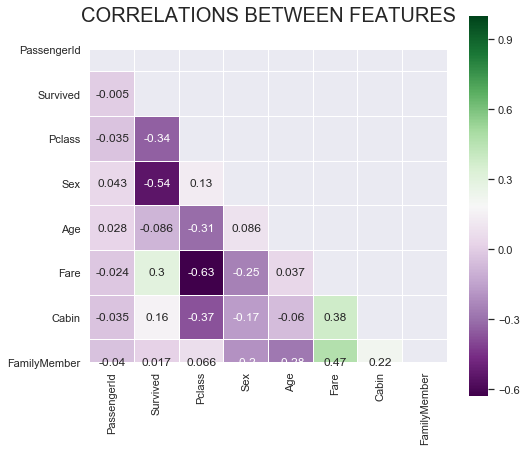

In [281]:
# we can see the correlation for some features with the target has improved after cleaning:[Age,Fare]
mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (8,7))
sns.heatmap(train.corr(), annot=True,mask = mask, cmap ='PRGn',linewidths=0.1,square=True)
plt.title("CORRELATIONS BETWEEN FEATURES\n", y = 1.03,fontsize = 20);



---------------------------------

<a id='the_destination_5'></a>

# 5. Machine learning

<a id='the_destination_5.1'></a>

## 5.1 Models Prepration

In [282]:
train = pd.get_dummies(train, columns=['Name','Embarked'],drop_first=True)

test = pd.get_dummies(test, columns=['Name','Embarked'],drop_first=True)

In [283]:
#drop the passenger Id from the test dataframe
test_prediction=test.drop(['PassengerId'],axis=1)
test_prediction.head()

,Pclass,Sex,Age,Fare,Cabin,FamilyMember,Name_Miss.,Name_Mr.,Name_Mrs.,Name_NoTitle,Embarked_Q,Embarked_S
0,3,1,1,0,3,1,0,1,0,0,1,0
1,3,0,1,0,5,2,0,0,1,0,0,1
2,2,1,1,1,3,1,0,1,0,0,1,0
3,3,1,1,1,5,1,0,1,0,0,0,1
4,3,0,1,1,5,3,0,0,1,0,0,1


In [284]:
X=train.drop(['PassengerId','Survived'],axis=1).copy()
y=train['Survived'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

In [285]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'FamilyMember', 'Name_Miss.',
       'Name_Mr.', 'Name_Mrs.', 'Name_NoTitle', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## 5.2 Models

different classification models will be applied to get the higher prediction accuracy. The models are going to be applied include: Random Forest, Random Forest Grid Search, Adabost Grid Search, SVM Grid Search, KNN, Decision Tree, Bagging with Decision Tree, and Logistic Regression

<a id='the_destination_5.2.1'></a>

## 5.2.1 Random Forest

In [286]:
# # to find the best random_state,test_size and n_estimators will we use for loop with the range(1,6)

# for i in range(1,6):
#     for k in range(1,6):
#         X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=i,test_size=k/10)
#         rf = RandomForestClassifier(n_estimators=i*100,random_state=i)
#         rf.fit(X_train,y_train)
#         tr_score=rf.score(X_train, y_train)
#         tr_score
#         te_score=rf.score(X_test, y_test)
#         te_score
#         print("test size",k,"and","random state",i,"result of test score=",te_score)

The highest accuracy parameters are test size=10% and random state=4

In [287]:
# use the best 3 parameters we find from the loop above 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4,test_size=.1)
rf = RandomForestClassifier(n_estimators=100,random_state=4)

#train te model
rf.fit(X_train,y_train)

tr_score=rf.score(X_train, y_train)
print('The training score:',tr_score)

te_score=rf.score(X_test, y_test)
print('The testing score:',te_score)

print("test size","10%","and","random state",4,"result of test score=",te_score)


The training score: 0.8951310861423221
The testing score: 0.9
test size 10% and random state 4 result of test score= 0.9


In [288]:
pred_4=rf.predict(test_prediction)
acc_rf= accuracy_score(gender_sub['Survived'],pred_4)

acc_rf

0.8923444976076556

In [289]:
y_dataframe=pd.DataFrame(pred_4,columns=['Survivor_pred'])

dataset=pd.concat([gender_sub['PassengerId'],y_dataframe],axis=1)
dataset.columns=['PassengerId','Survived']
dataset.to_csv('titanic_sub_forest_.csv',index=False)

<a id='the_destination_5.2.2'></a>

## 5.2.2 Random Forest with GridSearch

In [310]:
Rforest = RandomForestClassifier()

params = {'max_depth': [1, 2, 3, 4, 5, 6,8,9,10,13,15,16,17,18,20],
          'max_features':[1,.2,.3,.4,.6,.8,.9],
          'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
          'min_samples_leaf': [1, 2, 3, 4]}
    
gs = GridSearchCV(Rforest, param_grid=params, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [315]:
#print the best estimator
print(gs.best_estimator_)
#print the traning score
print('\n\ntraining score : ', gs.score(X_train, y_train))
#print the testing score
print('test score: ', gs.score(X_test, y_test))
print('The Baseline accuracy:\n',y_train.value_counts(normalize=True))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features=0.8,
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


training score :  0.8426966292134831
test score:  0.8134328358208955
The Baseline accuracy:
 0    0.601926
1    0.398074
Name: Survived, dtype: float64


In [316]:
pred_survivor=gs.predict(test_prediction)


In [317]:
acc_rf_gs= accuracy_score(gender_sub['Survived'],pred_survivor)

print('The Random Forest accuracy:',acc_rf_gs)

The Random Forest accuracy: 0.6363636363636364


In [844]:
# y_dataframe=pd.DataFrame(pred_survivor,columns=['Survivor_pred'])

# dataset=pd.concat([gender_sub['PassengerId'],y_dataframe],axis=1)
# dataset.columns=['PassengerId','Survived']
# dataset.to_csv('titanic_sub_forest_grid.csv',index=False)



<a id='the_destination_5.2.3'></a>

## 5.2.3 AdaBoost with GridSearch

In [290]:
model_adaboost = AdaBoostClassifier()

params_adaboost = {
          'n_estimators':[10,20,40,50,70,80],
            'random_state':[1,2,20,40],
           'learning_rate':[1,2,3,4,10,20]
          }


Boost_grid = GridSearchCV(model_adaboost, param_grid=params_adaboost, cv=5)

Boost_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [1, 2, 3, 4, 10, 20],
                         'n_estimators': [10, 20, 40, 50, 70, 80],
                         'random_state': [1, 2, 20, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [292]:
#print the training score
print('Train accuracy:',Boost_grid.score(X_train, y_train))
#print the testing score
print('Test accuracy:',Boost_grid.score(X_test, y_test))


Train accuracy: 0.8302122347066168
Test accuracy: 0.9


In [293]:
pred_survivor_boost=Boost_grid.predict(test_prediction)
acc_adboost= accuracy_score(gender_sub['Survived'],pred_survivor_boost)

print('The Adaboost classifier accuracy:', acc_adboost)

The Adaboost classifier accuracy: 0.8205741626794258


In [294]:
# y_dataframe=pd.DataFrame(pred_survivor_boost,columns=['Survivor_pred'])

# dataset=pd.concat([gender_sub['PassengerId'],y_dataframe],axis=1)
# dataset.columns=['PassengerId','Survived']
# dataset.to_csv('titanic_sub_adaboost.csv',index=False)



<a id='the_destination_5.2.4'></a>

## 5.2.4 SVM with GridSearch

In [295]:
from sklearn import svm 


parm_grid = {'gamma': np.logspace(-5, 2, 20)}
svm = svm.SVC(kernel='rbf')

grid = GridSearchCV(svm, parm_grid, cv=5)

grid.fit(X_train, y_train)

grid.best_params_

{'gamma': 0.6158482110660255}

In [296]:
grid.best_score_

0.826475155279503

In [297]:
pred_svm=grid.predict(test_prediction)
acc_svm= accuracy_score(gender_sub['Survived'],pred_svm)

print('The SVM accuracy:', acc_svm)


The SVM accuracy: 0.8086124401913876


In [298]:
# y_dataframe=pd.DataFrame(pred_svm,columns=['Survivor_pred'])

# dataset=pd.concat([gender_sub['PassengerId'],y_dataframe],axis=1)
# dataset.columns=['PassengerId','Survived']
# dataset.to_csv('titanic_sub_svm.csv',index=False)

<a id='the_destination_5.2.5'></a>

## 5.2.5 KNN

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)  

In [301]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

classifier = KNeighborsClassifier(n_neighbors=9)  
classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(test_prediction) 
y_pred_knn
acc_knn= accuracy_score(gender_sub['Survived'],y_pred_knn)
print("when knn=",2,"accuracy=",acc_knn)



when knn= 2 accuracy= 0.6602870813397129


<a id='the_destination_5.2.6'></a>


## 5.2.6 Decision Tree

In [302]:
decision_tree = DecisionTreeClassifier(max_depth=50)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(test_prediction)
acc_decision_tree = decision_tree.score(X_test,y_test)
print('The accuracy for Decision Tree prediction:',acc_decision_tree)

The accuracy for Decision Tree prediction: 0.832089552238806


In [303]:
parameters = { 'max_features': [0.3, 0.6, 1],
        'n_estimators': [50, 150, 200], 
         'base_estimator__max_depth': [3, 5, 20]}
model_dec_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True)
model_gs_dectree = GridSearchCV(model_dec_tree ,parameters, cv=4, n_jobs=-1 )

model_gs_dectree.fit(X_train, y_train)
print('The best parameters',model_gs_dectree.best_params_)
print('The best estimator and OBB score:',model_gs_dectree.best_estimator_.oob_score_)

dectree_pred=model_gs_dectree.predict(test_prediction)
y_dataframe=pd.DataFrame(dectree_pred,columns=['Survivor_pred'])
acc_dt= accuracy_score(gender_sub['Survived'],dectree_pred)

print('The accuracy for Decision Tree prediction:',acc_dt)

The best parameters {'base_estimator__max_depth': 5, 'max_features': 0.6, 'n_estimators': 200}
The best estimator and OBB score: 0.8170144462279294
The accuracy for Decision Tree prediction: 0.6363636363636364


<a id='the_destination_5.2.7'></a>


## 5.2.7 Bagging With Decision Tree


In [304]:
dt = DecisionTreeClassifier()
dt_en = BaggingClassifier(base_estimator=dt, n_estimators=200, oob_score=True )
dt_en.fit(X_train, y_train)
print('The train score:',dt_en.score(X_train, y_train))
print('The test score:',dt_en.score(X_test, y_test))
print('The OOB score:',dt_en.oob_score_)

bag_tree_pred=dt_en.predict(test_prediction)
print('The accuracy for Bagging classifier prediction:',bag_tree_pred)

The train score: 0.9004815409309791
The test score: 0.832089552238806
The OOB score: 0.8089887640449438
The accuracy for Bagging classifier prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]

In [307]:
param = { 'max_features': [0.3, 0.6, 1],
        'n_estimators': [50, 150, 200], 
         'base_estimator__max_depth': [3, 5, 20]}
model_bag_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True)
model_gs_bagtree = GridSearchCV(model_bag_tree,param, cv=4, verbose=1, n_jobs=-1 )
model_gs_bagtree.fit(X_train, y_train)

print('The best parameters',model_gs_bagtree.best_params_)
print('The best estimator obb score',model_gs_bagtree.best_estimator_.oob_score_)


bagtree_pred=model_gs_bagtree.predict(test_prediction)
acc_bagtree= accuracy_score(gender_sub['Survived'],bagtree_pred)

print('The accuracy for Bagging classifier prediction:',acc_bagtree)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    6.5s finished


The best parameters {'base_estimator__max_depth': 5, 'max_features': 0.6, 'n_estimators': 200}
The best estimator obb score 0.8202247191011236
The accuracy for Bagging classifier prediction: 0.6363636363636364


<a id='the_destination_5.2.8'></a>
## 5.2.8 Logistic Regression

In [308]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(test_prediction)

acc_log= accuracy_score(gender_sub['Survived'],y_pred_logreg)
print('The accuracy for Logistic Regression prediction:',acc_log)



The accuracy for Logistic Regression prediction: 0.6363636363636364


In [309]:
y_dataframe=pd.DataFrame(y_pred_logreg,columns=['Survivor_pred'])

dataset=pd.concat([gender_sub['PassengerId'],y_dataframe],axis=1)
dataset.columns=['PassengerId','Survived']
dataset.to_csv('titanic_sub_logistic.csv',index=False)

<a id='the_destination_6'></a>

# 6. Final Result

The below graph is to compare the accuracy of all models before submission to Kaggle

In [318]:
list_scores = [acc_rf,acc_rf_gs,acc_adboost,acc_svm,acc_knn,acc_dt,acc_bagtree,acc_log]
list_classifiers = ['RandomForest','RandomForest_GS','Adboost','SVM','KNN','Decision Tree','Baggin-DT','Logistic Regression']


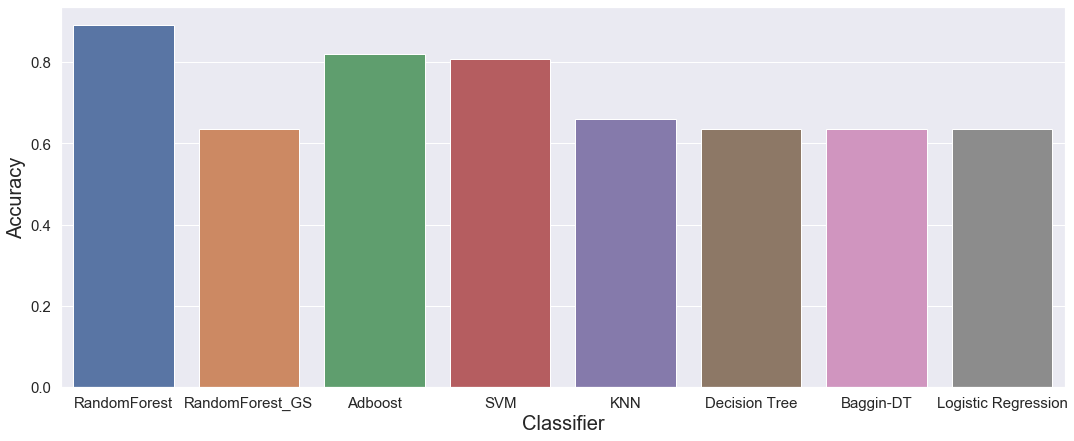

In [319]:
fig, ax = plt.subplots()
fig.set_size_inches(18,7)
sns.barplot(x=list_classifiers, y=list_scores, ax=ax)
plt.xlabel('Classifier',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
ax.tick_params(labelsize=15)

plt.show()

   ### After submission to Kaggle Random Forest has the highest accuracy of    <font color=blue>79.425%</font>



##    The Random Forest score in Kaggle <br>
<img 
     src="best_score.png"
     alt="The Random Forest score"
     style="float: left; margin-right: 10px;" />




<a id='the_destination_7'></a>

# 7. Conclusion and Recommendation

* As the data is belonging to an event occured +100 years ago, it has a level of anaccuracy , so having structured data with accurate information will increase the probabilty of higher accurate prediction.


* Such historic data can give us an insight to understand social classes, and economic situation back then.
 

* Having more features like the location of cabin on the ship,Weight of a passenger, and health status before getting in the ship could help to classify the data and give more patterns to the machine to learn


<a id='the_destination_8'></a>

# 8. References

- [Social class](https://ayobamisoluade2003.wixsite.com/the-english-web/1912-class-system)
- [Titanic victims](https://www.littlethings.com/titanic-victims/4)
- [The RMS Titanic](http://www.titanicuniverse.com)